<a href="https://colab.research.google.com/github/AhmedEloumi/Applications-of-Autoencoders/blob/main/Basics_structures_of_autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from matplotlib.pyplot import imshow
import numpy as np
import cv2
from keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

In [4]:
np.random.seed(42)

SIZE=256
img_data=[]

img=cv2.imread('/content/IMG_20210731_180759_459.jpg', 1)   #Change 1 to 0 for grey images
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Changing BGR to RGB to show images in true colors
img=cv2.resize(img,(SIZE, SIZE))
img_data.append(img_to_array(img))

img_array = np.reshape(img_data, (len(img_data), SIZE, SIZE, 3))
img_array = img_array.astype('float32') / 255.

In [8]:
print(img_array.shape)

(1, 256, 256, 3)


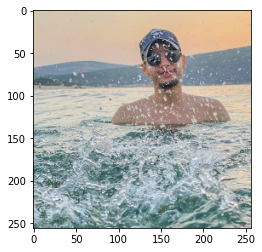

In [11]:
imshow(img_array.reshape(SIZE,SIZE,3), cmap="gray")

In [16]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same')) 
model.add(MaxPooling2D((2, 2), padding='same'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 128, 128, 8)       2312      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 64, 64, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 64, 64, 8)         584       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 32, 32, 8)       

In [17]:
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(3, (3, 3), activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 128, 128, 8)       2312      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 64, 64, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 64, 64, 8)         584       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 32, 32, 8)       

In [22]:
model.fit(img_array, img_array,
        epochs=5,
        shuffle=True ) #epochs 5000


print("Neural network output")
pred = model.predict(img_array)

Epoch 1/5
1/1 [==============================] - 0s 202ms/step - loss: 0.1330 - accuracy: 0.3130
Epoch 2/5
1/1 [==============================] - 0s 210ms/step - loss: 0.1001 - accuracy: 0.1871
Epoch 3/5
1/1 [==============================] - 0s 217ms/step - loss: 0.0632 - accuracy: 0.1750
Epoch 4/5
1/1 [==============================] - 0s 213ms/step - loss: 0.0397 - accuracy: 0.1708
Epoch 5/5
1/1 [==============================] - 0s 219ms/step - loss: 0.0315 - accuracy: 0.1696
Neural network output


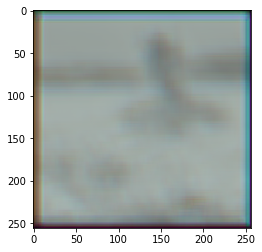

In [23]:
imshow(pred[0].reshape(SIZE,SIZE,3), cmap="gray")